In [1]:
from matplotlib import pyplot as plt
import numpy as np
import json
np.set_printoptions(precision=3,suppress=True)

labels = {0:'l-jet',4:'c-jet',5:'b-jet'}
x_labels_id = [0,4,5]
x_labels_str = [labels[i] for i in x_labels_id]
nlabels=len(x_labels_id)

# handle stupid colormap being too long
from mpl_toolkits.axes_grid1 import make_axes_locatable
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)

def combine_ljets():
    # combines udsc-jet
    matA = np.sum(mat[0:2,...],axis=0)
    matB = np.array([matA,mat[2],mat[3],mat[4]])
    matC = np.sum(matB[...,0:2],axis=1)
    mat = np.array([matC,matB[...,2],matB[...,3],matB[...,4]]).transpose()

In [8]:

# 1849190_model_00006_00900.torch_model_state_dict
# mat = """[[1572. 1286.  842.]
#  [ 855.  992.  922.]
#  [1058. 1375. 1898.]]"""
# 1853197_model_00008_00100.torch_model_state_dict
# mat = """[[1703. 1425.  986.]
#  [ 870.  975.  922.]
#  [ 917. 1250. 1752.]]"""
# 1857167_model_00012_00800.torch_model_state_dict
# continuation of 1853197
# mat = """[[1616. 1372.  860.]
#  [1338. 1503. 1613.]
#  [ 395.  656. 1047.]]"""
# 1857507_model_00017_00500.torch_model_state_dict
# continuation of 1857167
# mat = """[[ 896.  648.  312.]
#  [ 719.  743.  488.]
#  [1745. 2145. 2704.]]"""
# 1858255_model_00017_00500.torch_model_state_dict
# continuation of 1857507
mat = """[[1405. 1172.  608.]
 [ 704.  671.  573.]
 [1252. 1677. 2338.]]"""
# 1858950_model_00016_00700.torch_model_state_dict
# continuation of 1858255
mat = """[[1404. 1163.  589.]
 [ 755.  722.  619.]
 [1328. 1766. 2454.]]"""
# 353778_model_00002_00170.torch_model_state_dict
mat = """ [[7481. 5833. 3379.]
 [5666. 6238. 5858.]
 [4705. 6352. 9288.]]"""

mat = mat.replace('\n',',')
mat = mat.replace('. ',',').replace('.','')
mat = json.loads(mat)

mat = np.array(mat,dtype=np.float32)
print('mat')
print(mat)
sums=[]
for i in range(len(mat)):
    m = mat[i]
    s = m.sum(axis=0)
    sums.append(s.sum())
    mat[i] = np.divide(m,s,where=s!=0,out=np.zeros(m.shape))
print('norm')
print(mat)
#mat = np.array(pt_mat)

mat
[[7481. 5833. 3379.]
 [5666. 6238. 5858.]
 [4705. 6352. 9288.]]
norm
[[0.448 0.349 0.202]
 [0.319 0.351 0.33 ]
 [0.231 0.312 0.457]]


matrix: Columns are predictions, rows are groundtruth

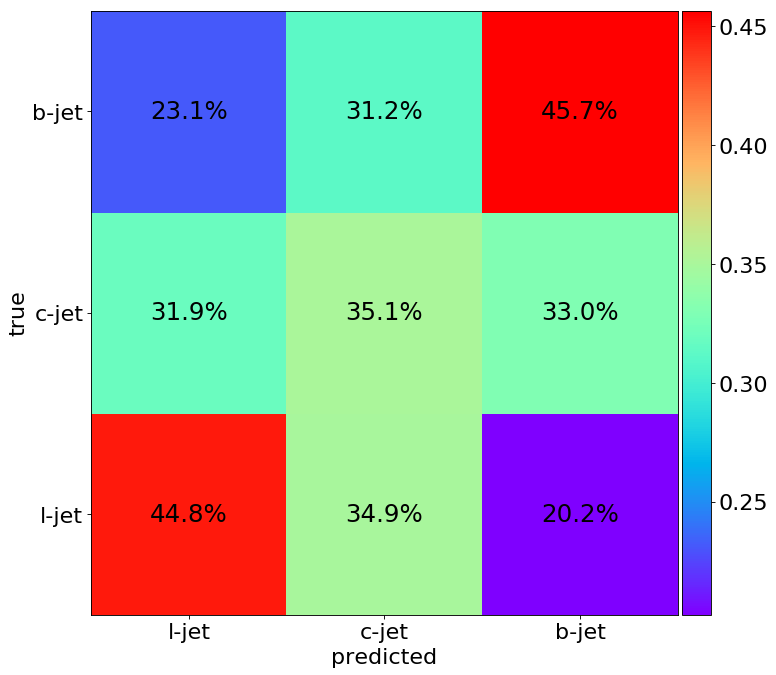

In [9]:
# add extent to figure to help place labels
x_start = 0.0
x_end = len(x_labels_id)
y_start = 0.0
y_end = len(x_labels_id)
extent = [x_start, x_end, y_start, y_end]

def plot_matrix(mat,title=''):
    fig,ax = plt.subplots(figsize=(10,10),dpi=80)
    im = ax.imshow(mat, extent=extent, origin='lower', interpolation='None', cmap='rainbow',aspect='equal')
    ax.set_xticks(np.array(range(nlabels))+0.5)
    ax.set_xticklabels(x_labels_str,fontsize=20)
    ax.set_yticks(np.array(range(nlabels))+0.5)
    ax.set_yticklabels(x_labels_str,fontsize=20)
    ax.set_ylabel('true',fontsize=20)
    ax.set_xlabel('predicted',fontsize=20)
    ax.set_aspect('auto')

    # Add the text
    jump_x = (x_end - x_start) / (2.0 * nlabels)
    jump_y = (y_end - y_start) / (2.0 * nlabels)
    x_positions = np.linspace(start=x_start, stop=x_end, num=nlabels, endpoint=False)
    y_positions = np.linspace(start=y_start, stop=y_end, num=nlabels, endpoint=False)

    for y_index, y in enumerate(y_positions):
        for x_index, x in enumerate(x_positions):
            label = '%4.1f%%' % (mat[y_index, x_index]*100.)
            #label = '%d' % mat[y_index][x_index]
            text_x = x + jump_x
            text_y = y + jump_y
            ax.text(text_x, text_y, label, color='black', ha='center', va='center',fontsize=22)

    cbar = colorbar(im)
    cbar.ax.tick_params(labelsize=20)
    plt.suptitle(title,fontsize=20,ha='center')
    plt.show()

plot_matrix(mat)